# Decision Trees
In this Jupyter Notebook a Decision Trees and Random Forrest Classifiers will be implemented. Data cleaning from the previous notebook will be used and then it is splitted into trainin-validation-test sets for implementing the different models. The following steps are developed in this work:

1. Data preparation.
2. Model Development - Decision Tree <br>
    2.1 Decision Tree Training <br>
    2.2 Decision Tree tuning <br>
    2.3 Decision Tree -Final model <br>
3. Model Development - Random Forrest <br>
    3.1 Random Forrest tuning <br>
    &ensp; 3.1.1 Tune n_estimators and max_depth <br>
    &ensp; 3.1.2 Tune min_samples_leaf <br>
    3.2 Train final model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import KFold

## 1. Data preparation

In [5]:
df = pd.read_csv('../datasets/heart_disease/heart_2020_cleaned.csv')
df.columns = df.columns.str.lower()

numerical = list(df.dtypes[df.dtypes == 'float'].index.values)
categorical = list(df.dtypes[df.dtypes == 'object'].index.values)
categorical.remove('heartdisease')

for c in categorical:
    df[c] = df[c].str.lower()

df['heartdisease'] = df['heartdisease'].str.lower()


df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = (df_train['heartdisease']=='yes').astype('int').values
y_val = (df_val['heartdisease']=='yes').astype('int').values
y_test = (df_test['heartdisease']=='yes').astype('int').values

df_train = df_train.drop(columns='heartdisease')
df_val = df_val.drop(columns='heartdisease')
df_test = df_test.drop(columns='heartdisease')

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

## 2. Model Development - Decision Tree

### 2.1 Decision Tree Training

In [7]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=1)

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
y_pred = dt.predict_proba(X_val)[:,1]

In [10]:
roc_auc_score(y_val,y_pred)

0.5855235350482807

### 2.2 Decision Tree tuning

In [11]:
scores = []
for d in range(1,20):
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=1, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val,y_pred)
    scores.append((d,score))

In [12]:
scores = np.array(scores)

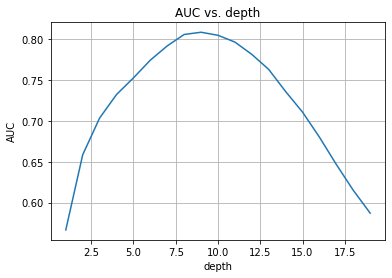

In [13]:
plt.plot(scores[:,0], scores[:,1])
plt.grid('on')
plt.title('AUC vs. depth')
plt.xlabel('depth')
plt.ylabel('AUC')
plt.show()

In [14]:
scores

array([[ 1.        ,  0.56646293],
       [ 2.        ,  0.65850378],
       [ 3.        ,  0.70348737],
       [ 4.        ,  0.73229338],
       [ 5.        ,  0.75266842],
       [ 6.        ,  0.77444035],
       [ 7.        ,  0.79188957],
       [ 8.        ,  0.80586548],
       [ 9.        ,  0.8085978 ],
       [10.        ,  0.80487686],
       [11.        ,  0.79656085],
       [12.        ,  0.78149719],
       [13.        ,  0.76308659],
       [14.        ,  0.73598345],
       [15.        ,  0.71077933],
       [16.        ,  0.68008782],
       [17.        ,  0.646654  ],
       [18.        ,  0.61503192],
       [19.        ,  0.58705408]])

In [15]:
best_depth = 9

In [16]:
scores = []
for s in tqdm(range(1,20)):
    dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=s, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val,y_pred)
    scores.append((s,score))

  0%|          | 0/19 [00:00<?, ?it/s]

In [17]:
scores = np.array(scores)

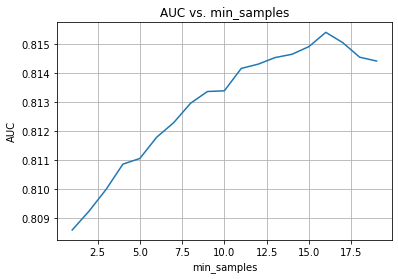

In [18]:
plt.plot(scores[:,0], scores[:,1])
plt.grid('on')
plt.title('AUC vs. min_samples')
plt.xlabel('min_samples')
plt.ylabel('AUC')
plt.show()

In [19]:
scores

array([[ 1.        ,  0.8085978 ],
       [ 2.        ,  0.80924847],
       [ 3.        ,  0.80999085],
       [ 4.        ,  0.810865  ],
       [ 5.        ,  0.81105963],
       [ 6.        ,  0.81179351],
       [ 7.        ,  0.8122905 ],
       [ 8.        ,  0.81296057],
       [ 9.        ,  0.81336624],
       [10.        ,  0.81339014],
       [11.        ,  0.81416009],
       [12.        ,  0.81430693],
       [13.        ,  0.81453411],
       [14.        ,  0.81464733],
       [15.        ,  0.81491136],
       [16.        ,  0.81540278],
       [17.        ,  0.81504914],
       [18.        ,  0.81454723],
       [19.        ,  0.81441444]])

In [20]:
best_min_samples = 16

### 2.3 Decision Tree -Final model

In [21]:
dt = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples, random_state=1)

In [22]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=16, random_state=1)

In [23]:
y_pred = dt.predict_proba(X_val)[:,1]

In [24]:
roc_auc_score(y_val,y_pred)

0.8154027839227462

## 3. Model Development - Random Forrest

In [26]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, random_state=1)

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [28]:
y_pred = rf.predict_proba(X_val)[:,1]

In [29]:
roc_auc_score(y_val, y_pred)

0.7850173456498931

### 3.1 Random Forrest tuning

#### 3.1.1 Tune `n_estimators` and `max_depth`

First lets try to estimate a good value for the `n_estimators` parameter

In [30]:
scores = []
for n in tqdm([1, 2, 4, 8, 16, 32, 50, 60, 80, 100, 120, 150]):
    score = []
    
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, min_samples_leaf=1, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    scores.append((n,score))

  0%|          | 0/12 [00:00<?, ?it/s]

In [31]:
scores

[(1, 0.5801168050156054),
 (2, 0.6236344790684925),
 (4, 0.6802739248594968),
 (8, 0.7252199033179745),
 (16, 0.7521956576321963),
 (32, 0.7699464183213987),
 (50, 0.7771734827258944),
 (60, 0.7802190118064806),
 (80, 0.78266642837882),
 (100, 0.7850173456498931),
 (120, 0.7862737256913076),
 (150, 0.7873843912280694)]

Since the AUC value still goes up, we can inspect a little more...

In [32]:
scores = []
for n in tqdm([150, 160, 180, 200, 500]):
    score = []
    
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, min_samples_leaf=1, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    scores.append((n,score))

  0%|          | 0/5 [00:00<?, ?it/s]

In [34]:
scores

[(150, 0.7873843912280694),
 (160, 0.7881450959787114),
 (180, 0.7888084680363384),
 (200, 0.7891211734125966),
 (500, 0.7919946786195443)]

With the previous calculation we have an estimate of good values to use for the `n_estimators`. Now both `max_depth` and `n_estimators` can be obtained.

In [35]:
scores_dict = {}

for d in [1, 2, 3, 5, 10, 15, 20, 25, 50, 100, None]:
    scores = []
    for n in tqdm([100, 200, 300, 500]):
        score = []

        rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_leaf=1, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        score = roc_auc_score(y_val, y_pred)
        scores.append((n,score))
    scores_dict[d] = scores

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
scores_dict.keys()

dict_keys([1, 2, 3, 5, 10, 15, 20, 25, 50, 100, None])

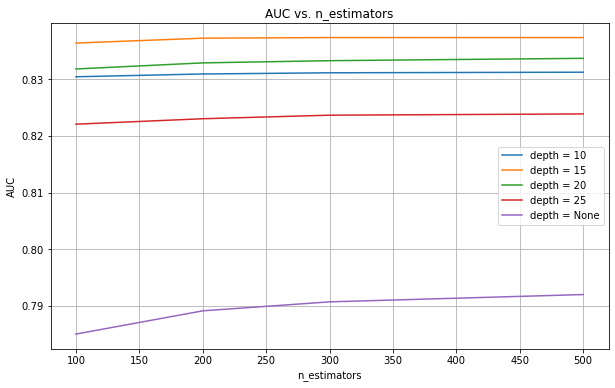

In [45]:
plt.rcParams['figure.figsize'] = [10, 6]
for key in [10, 15, 20, 25, None]:
    scores_array = np.array(scores_dict[key])
    plt.plot(scores_array[:,0], scores_array[:,1], label='depth = '+str(key))
    plt.grid('on')
    plt.title('AUC vs. n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.legend()
plt.show()

#### 3.1.2 Tune `min_samples_leaf`

In [46]:
best_depth = 15
best_estimator = 300

In [47]:
scores = []
for s in tqdm([1, 2, 3, 4, 5, 10, 20, 50, 75, 100]):
    score = []
    
    rf = RandomForestClassifier(n_estimators=best_estimator, max_depth=best_depth,
                                min_samples_leaf=s, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    scores.append((s,score))

  0%|          | 0/10 [00:00<?, ?it/s]

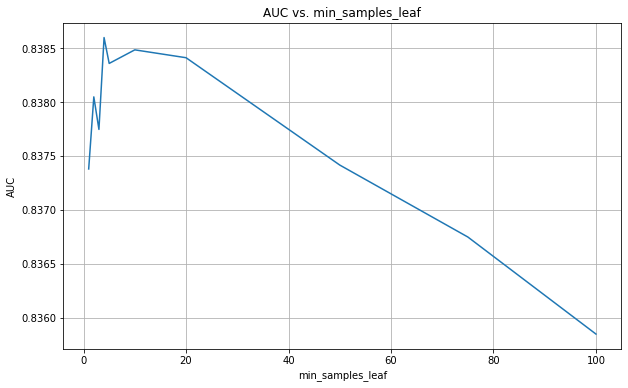

In [48]:
scores_array = np.array(scores)
plt.plot(scores_array[:,0], scores_array[:,1], label=str(key))
plt.grid('on')
plt.title('AUC vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.show()

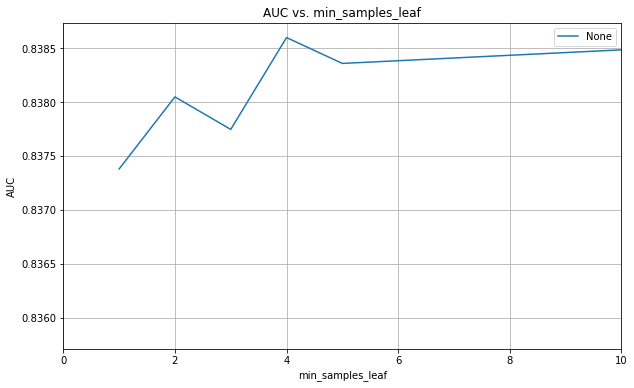

In [49]:
scores_array = np.array(scores)
plt.plot(scores_array[:,0], scores_array[:,1], label=str(key))
plt.grid('on')
plt.title('AUC vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.xlim(0,10)
plt.legend()
plt.show()

In [50]:
best_min_samples_leaf = 4

### 3.2 Train final model

In [51]:
best_estimator = 300
best_depth = 15
best_min_samples_leaf = 4

In [52]:
rf = RandomForestClassifier(n_estimators=best_estimator,
                            max_depth=best_depth, 
                            min_samples_leaf=best_min_samples_leaf, 
                            random_state=1)

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=300,
                       random_state=1)

In [54]:
y_pred = rf.predict_proba(X_val)[:,1]

In [55]:
roc_auc_score(y_val,y_pred)

0.8385978316925435